# Pytorch_Tutorial
> 파이토치 튜토리얼

- toc: true 
- badges: true
- comments: true
- categories: [Pytorch]
- image: images/

---

- https://pytorch.org/tutorials/beginner/basics/intro.html

---
# 1. TENSORS

- Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators.

In [2]:
import torch
import numpy as np

## Initializing a Tensor

### Directly from data

In [3]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [4]:
x_data

tensor([[1, 2],
        [3, 4]])

### From a NumPy array

In [5]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [6]:
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

### From another tensor:

In [7]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.8391, 0.5009],
        [0.9606, 0.3604]]) 



### With random or constant values:

In [8]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.1136, 0.1366, 0.7857],
        [0.5840, 0.8021, 0.7719]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Attributes of a Tensor

In [9]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Operations on Tensors

- By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using

In [10]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

### Standard numpy-like indexing and slicing:

In [11]:
tensor = torch.ones(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### Joining tensors
You can use `torch.cat` to concatenate a sequence of tensors along a given dimension.

In [12]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


### Arithmetic operations

In [13]:
# This computes the matrix multiplication between two tensors.
y1 = tensor @ tensor.T

In [14]:
# This computes the element-wise product.
z1 = tensor * tensor

### Single-element tensors
If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using `item()`:

In [15]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


---

# 2. DATASETS & DATALOADERS

- `Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples.

## Loading a Dataset 데이터셋 불러오기

TorchVision 에서 Fashion-MNIST 데이터셋을 불러오는 예제를 살펴보겠습니다. Fashion-MNIST는 Zalando의 기사 이미지 데이터셋으로 60,000개의 학습 예제와 10,000개의 테스트 예제로 이루어져 있습니다. 각 예제는 흑백(grayscale)의 28x28 이미지와 10개 분류(class) 중 하나인 정답(label)으로 구성됩니다.

We load the FashionMNIST Dataset with the following parameters:
- `root` 는 학습/테스트 데이터가 저장되는 경로입니다.
- `train` 은 학습용 또는 테스트용 데이터셋 여부를 지정합니다.
- `download=True` 는 `root` 에 데이터가 없는 경우 인터넷에서 다운로드합니다.
- `transform` 과 `target_transform` 은 특징(feature)과 정답(label) 변형(transform)을 지정합니다.

In [16]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

C:\Users\ksko\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\ksko\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


## Iterating and Visualizing the Dataset 데이터셋을 순회하고 시각화하기

`Dataset` 에 리스트(list)처럼 직접 접근(index)할 수 있습니다: `training_data[index]`. `matplotlib` 을 사용하여 학습 데이터의 일부를 시각화해보겠습니다..

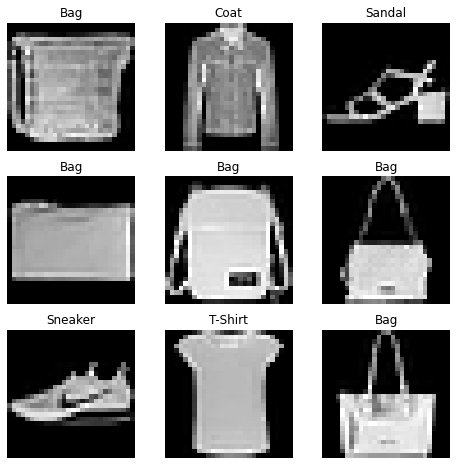

In [25]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating a Custom Dataset for your files

사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현해야 합니다: \_\_init__, \_\_len__, and \_\_getitem__. 아래 구현을 살펴보면 FashionMNIST 이미지들은 `img_dir` 디렉토리에 저장되고, 정답은 `annotations_file` csv 파일에 별도로 저장됩니다.

In the next sections, we’ll break down what’s happening in each of these functions.

In [17]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### \_\_init__

\_\_init__  함수는 Dataset 객체가 생성(instantiate)될 때 한 번만 실행됩니다. 여기서는 이미지와 주석 파일(annotation_file)이 포함된 디렉토리와 (다음 장에서 자세히 살펴볼) 두가지 변형(transform)을 초기화합니다.

labels.csv 파일은 다음과 같습니다:

```
tshirt1.jpg, 0
tshirt2.jpg, 0
......
ankleboot999.jpg, 9
```

In [18]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

### \_\_len__

\_\_len__ 함수는 데이터셋의 샘플 개수를 반환합니다.

Example:

In [19]:
def __len__(self):
    return len(self.img_labels)

### \_\_getitem__

\_\_getitem__ 함수는 주어진 인덱스 `idx` 에 해당하는 샘플을 데이터셋에서 불러오고 반환합니다. 인덱스를 기반으로, 디스크에서 이미지의 위치를 식별하고, `read_image` 를 사용하여 이미지를 텐서로 변환하고, `self.img_labels` 의 csv 데이터로부터 해당하는 정답(label)을 가져오고, (해당하는 경우) 변형(transform) 함수들을 호출한 뒤, 텐서 이미지와 라벨을 Python 사전(dict)형으로 반환합니다.

In [20]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

## DataLoader로 학습용 데이터 준비하기

`Dataset` 은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다. 모델을 학습할 때, 일반적으로 샘플들을 “미니배치(minibatch)”로 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, Python의 `multiprocessing` 을 사용하여 데이터 검색 속도를 높이려고 합니다.

DataLoader 는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체(iterable)입니다.

In [21]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## DataLoader를 통해 순회하기(iterate)

`DataLoader` 에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 순회(iterate)할 수 있습니다. 아래의 각 순회(iteration)는 (각각 `batch_size=64` 의 특징(feature)과 정답(label)을 포함하는) `train_features` 와 `train_labels` 의 묶음(batch)을 반환합니다. `shuffle=True` 로 지정했으므로, 모든 배치를 순회한 뒤 데이터가 섞입니다. (데이터 불러오기 순서를 보다 세밀하게(finer-grained) 제어하려면 Samplers 를 살펴보세요.)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


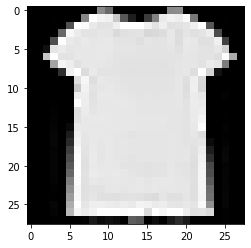

Label: 6


In [22]:
# ``` python
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
# ```

---

# 3. TRANSFORM

데이터가 항상 머신러닝 알고리즘 학습에 필요한 최종 처리가 된 형태로 제공되지는 않습니다. **변형(transform)** 을 해서 데이터를 조작하고 학습에 적합하게 만듭니다.

모든 TorchVision 데이터셋들은 변형 로직을 갖는, 호출 가능한 객체(callable)를 받는 매개변수 두개 ( 특징(feature)을 변경하기 위한 `transform` 과 정답(label)을 변경하기 위한 `target_transform` )를 갖습니다 torchvision.transforms 모듈은 주로 사용하는 몇가지 변형(transform)을 제공합니다.

FashionMNIST 특징(feature)은 PIL Image 형식이며, 정답(label)은 정수(integer)입니다. 학습을 하려면 정규화(normalize)된 텐서 형태의 특징(feature)과 원-핫(one-hot)으로 부호화(encode)된 텐서 형태의 정답(label)이 필요합니다. 이러한 변형(transformation)을 하기 위해 `ToTensor` 와 `Lambda` 를 사용합니다.

In [2]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## ToTensor()

ToTensor 는 PIL Image나 NumPy `ndarray` 를 `FloatTensor` 로 변환하고, 이미지의 픽셀의 크기(intensity) 값을 [0., 1.] 범위로 비례하여 조정(scale)합니다.

## Lambda 변형(Transform)

Lambda 변형은 사용자 정의 람다(lambda) 함수를 적용합니다. 여기에서는 정수를 원-핫으로 부호화된 텐서로 바꾸는 함수를 정의합니다. 이 함수는 먼저 (데이터셋 정답의 개수인) 크기 10짜리 영 텐서(zero tensor)를 만들고, scatter_ 를 호출하여 주어진 정답 `y` 에 해당하는 인덱스에 `value=1` 을 할당합니다.

In [3]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

---

# 4. 신경망 모델 구성하기

신경망은 데이터에 대한 연산을 수행하는 계층(layer)/모듈(module)로 구성되어 있습니다. torch.nn 네임스페이스는 신경망을 구성하는데 필요한 모든 구성 요소를 제공합니다. PyTorch의 모든 모듈은 nn.Module 의 하위 클래스(subclass) 입니다. 신경망은 다른 모듈(계층; layer)로 구성된 모듈입니다. 이러한 중첩된 구조는 복잡한 아키텍처를 쉽게 구축하고 관리할 수 있습니다.

이어지는 장에서는 FashionMNIST 데이터셋의 이미지들을 분류하는 신경망을 구성해보겠습니다.

In [4]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## 학습을 위한 장치 얻기

가능한 경우 GPU와 같은 하드웨어 가속기에서 모델을 학습하려고 합니다. torch.cuda 를 사용할 수 있는지 확인하고 그렇지 않으면 CPU를 계속 사용합니다.

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


## 클래스 정의하기

신경망 모델을 `nn.Module` 의 하위클래스로 정의하고, \_\_init__ 에서 신경망 계층들을 초기화합니다. `nn.Module` 을 상속받은 모든 클래스는 `forward` 메소드에 입력 데이터에 대한 연산들을 구현합니다.

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

`NeuralNetwork` 의 인스턴스(instance)를 생성하고 이를 `device` 로 이동한 뒤, 구조(structure)를 출력합니다.

In [7]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


모델을 사용하기 위해 입력 데이터를 전달합니다. 이는 일부 백그라운드 연산들 과 함께 모델의 `forward` 를 실행합니다. `model.forward()` 를 직접 호출하지 마세요!

모델에 입력을 호출하면 각 분류(class)에 대한 원시(raw) 예측값이 있는 10-차원 텐서가 반환됩니다. 원시 예측값을 `nn.Softmax` 모듈의 인스턴스에 통과시켜 예측 확률을 얻습니다.

In [13]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([3])


## 모델 계층(Layer)

FashionMNIST 모델의 계층들을 살펴보겠습니다. 이를 설명하기 위해, 28x28 크기의 이미지 3개로 구성된 미니배치를 가져와, 신경망을 통과할 때 어떤 일이 발생하는지 알아보겠습니다.

In [15]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


### nn.Flatten

nn.Flatten 계층을 초기화하여 각 28x28의 2D 이미지를 784 픽셀 값을 갖는 연속된 배열로 변환합니다. (dim=0의 미니배치 차원은 유지됩니다.)

In [16]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


### nn.Linear

선형 계층 은 저장된 가중치(weight)와 편향(bias)을 사용하여 입력에 선형 변환(linear transformation)을 적용하는 모듈입니다.

In [17]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### nn.ReLU

비선형 활성화(activation)는 모델의 입력과 출력 사이에 복잡한 관계(mapping)를 만듭니다. 비선형 활성화는 선형 변환 후에 적용되어 비선형성(nonlinearity) 을 도입하고, 신경망이 다양한 현상을 학습할 수 있도록 돕습니다.

이 모델에서는 nn.ReLU 를 선형 계층들 사이에 사용하지만, 모델을 만들 때는 비선형성을 가진 다른 활성화를 도입할 수도 있습니다.

In [19]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.1359, -0.3299, -0.1970,  0.5196, -0.0813, -0.2173, -0.1096, -0.0631,
         -0.0354,  0.2562, -0.1485, -0.5210,  0.2318, -0.2634,  0.7257, -0.1972,
         -0.3673, -0.4046, -0.0340, -0.5271],
        [ 0.1564, -0.3985,  0.1940,  0.4656,  0.3421, -0.4703, -0.2136, -0.1095,
         -0.2515,  0.0601, -0.3461, -0.7769,  0.2142, -0.0464,  0.9571, -0.1961,
          0.2188, -0.0828,  0.0039, -0.4262],
        [ 0.0486, -0.0440,  0.4727,  0.3145, -0.2762, -0.1264, -0.4441,  0.0866,
         -0.2323, -0.0479, -0.0198, -0.4986,  0.0509, -0.0111,  0.7532, -0.3162,
         -0.1697, -0.0800,  0.0344, -0.3996]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.1359, 0.0000, 0.0000, 0.5196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2562, 0.0000, 0.0000, 0.2318, 0.0000, 0.7257, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.1564, 0.0000, 0.1940, 0.4656, 0.3421, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0601, 0.0000, 0.0000, 0.2142, 0.0000, 0.95

### nn.Sequential

nn.Sequential 은 순서를 갖는 모듈의 컨테이너입니다. 데이터는 정의된 것과 같은 순서로 모든 모듈들을 통해 전달됩니다. 순차 컨테이너(sequential container)를 사용하여 아래의 `seq_modules` 와 같은 신경망을 빠르게 만들 수 있습니다.

In [21]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

### nn.Softmax

신경망의 마지막 선형 계층은 nn.Softmax 모듈에 전달될 ([-infty, infty] 범위의 원시 값(raw value)인) logits 를 반환합니다. logits는 모델의 각 분류(class)에 대한 예측 확률을 나타내도록 [0, 1] 범위로 비례하여 조정(scale)됩니다. `dim` 매개변수는 값의 합이 1이 되는 차원을 나타냅니다.

In [22]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

## 모델 매개변수

신경망 내부의 많은 계층들은 매개변수화(parameterize) 됩니다. 즉, 학습 중에 최적화되는 가중치와 편향과 연관지어집니다. `nn.Module` 을 상속하면 모델 객체 내부의 모든 필드들이 자동으로 추적(track)되며, 모델의 `parameters()` 및 `named_parameters()` 메소드로 모든 매개변수에 접근할 수 있게 됩니다.

이 예제에서는 각 매개변수들을 순회하며(iterate), 매개변수의 크기와 값을 출력합니다.

In [23]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0313, -0.0301, -0.0258,  ...,  0.0281,  0.0342,  0.0187],
        [ 0.0338,  0.0077,  0.0075,  ...,  0.0187,  0.0315,  0.0039]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0111, 0.0268], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0409, -0.0326,  0.0223,  ...,  0.0191,  0.0215, -0.0205],
        [-0.0012,  0.0316, -0.0183,  ...,  0.0206, -0.0111, -0.0350]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

# 5. Autograd
`TORCH.AUTOGRAD`를 사용한 자동 미분

신경망을 학습할 때 가장 자주 사용되는 알고리즘은 **역전파**입니다. 이 알고리즘에서, 매개변수(모델 가중치)는 주어진 매개변수에 대한 손실 함수의 **변화도(gradient)** 에 따라 조정됩니다.

이러한 변화도를 계산하기 위해 PyTorch에는 `torch.autograd`라고 불리는 자동 미분 엔진이 내장되어 있습니다. 이는 모든 계산 그래프에 대한 변화도의 자동 계산을 지원합니다.

입력 `x`, 매개변수 `w`와 `b` , 그리고 일부 손실 함수가 있는 가장 간단한 단일 계층 신경망을 가정하겠습니다. PyTorch에서는 다음과 같이 정의할 수 있습니다:

In [25]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

## Tensor, Function과 연산그래프(Computational graph)

이 코드는 다음의 **연산 그래프** 를 정의합니다:

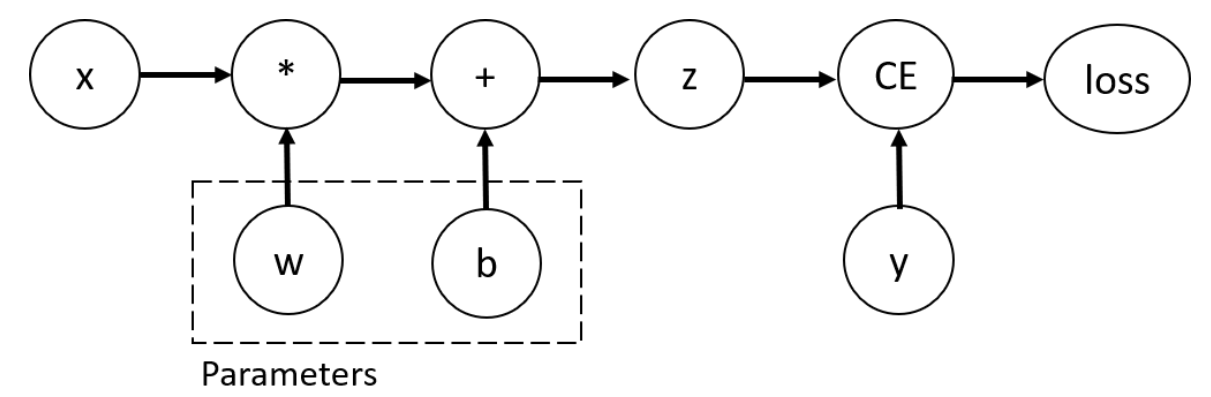

이 신경망에서, `w`와 `b`는 최적화를 해야 하는 **매개변수** 입니다. 따라서 이러한 변수들에 대한 손실 함수의 변화도를 계산할 수 있어야 합니다. 이를 위해서 해당 텐서에 `requires_grad` 속성을 설정합니다.

- note

`requires_grad`의 값은 텐서를 생성할 때 설정하거나, 나중에 `x.requires_grad_(True)` 메소드를 사용하여 나중에 설정할 수도 있습니다.

연산 그래프를 구성하기 위해 텐서에 적용하는 함수는 사실 `Function` 클래스의 객체입니다. 이 객체는 순전파 방향으로 함수를 계산하는 방법과, 역방향 전파 단계에서 도함수(derivative)를 계산하는 방법을 알고 있습니다. 역방향 전파 함수에 대한 참조(reference)는 텐서의 `grad_fn` 속성에 저장됩니다.

In [26]:
print('Gradient function for z =', z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x000001AFC94B79D0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x000001AFC94B7160>


## 변화도(Gradient) 계산하기

신경망에서 매개변수의 가중치를 최적화하려면 매개변수에 대한 손실함수의 도함수(derivative)를 계산해야 합니다. 즉, `x`와 `y`의 일부 고정값에서 $\frac{\partial loss}{\partial w} $ 와 $\frac{\partial loss}{\partial b} $ 가 필요합니다. 이러한 도함수를 계산하기 위해, loss.backward() 를 호출한 다음 w.grad와 b.grad에서 값을 가져옵니다:

In [27]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1565, 0.2825, 0.3122],
        [0.1565, 0.2825, 0.3122],
        [0.1565, 0.2825, 0.3122],
        [0.1565, 0.2825, 0.3122],
        [0.1565, 0.2825, 0.3122]])
tensor([0.1565, 0.2825, 0.3122])


- ***NOTE***

연산 그래프의 잎(leaf) 노드들 중 `requires_grad` 속성이 `True`로 설정된 노드들의 `grad` 속성만 구할 수 있습니다. 그래프의 다른 모든 노드에서는 변화도가 유효하지 않습니다.

성능 상의 이유로, 주어진 그래프에서의 `backward`를 사용한 변화도 계산은 한 번만 수행할 수 있습니다. 만약 동일한 그래프에서 여러번의 `backward` 호출이 필요하면, `backward` 호출 시에 `retrain_graph=True`를 전달해야 합니다.

## 변화도 추적 멈추기

기본적으로, `requires_grad=True`인 모든 텐서들은 연산 기록을 추적하고 변화도 계산을 지원합니다. 그러나 모델을 학습한 뒤 입력 데이터를 단순히 적용하기만 하는 경우와 같이 순전파 연산만 필요한 경우에는, 이러한 추적이나 지원이 필요없을 수 있습니다. 연산 코드를 `torch.no_grad()` 블록으로 둘러싸서 연산 추적을 멈출 수 있습니다:

In [28]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


동일한 결과를 얻는 다른 방법은 텐서에 `detach()` 메소드를 사용하는 것입니다:

In [29]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


변화도 추적을 멈춰야 하는 이유들은 다음과 같습니다:

- 신경망의 일부 매개변수를 **고정된 매개변수(frozen parameter)** 로 표시합니다. 이는 사전 학습된 신경망을 미세조정 할 때 매우 일반적인 시나리오입니다.
- 변화도를 추적하지 않는 텐서의 연산이 더 효율적이기 때문에, 순전파 단계만 수행할 때 **연산 속도가 향상됩니다.**

## 연산 그래프에 대한 추가 정보

개념적으로, autograd는 데이터(텐서)의 및 실행된 모든 연산들(및 연산 결과가 새로운 텐서인 경우도 포함하여)의 기록을 Function 객체로 구성된 방향성 비순환 그래프(DAG; Directed Acyclic Graph)에 저장(keep)합니다. 이 방향성 비순환 그래프(DAG)의 잎(leave)은 입력 텐서이고, 뿌리(root)는 결과 텐서입니다. 이 그래프를 뿌리에서부터 잎까지 추적하면 연쇄 법칙(chain rule)에 따라 변화도를 자동으로 계산할 수 있습니다.

순전파 단계에서, autograd는 다음 두 가지 작업을 동시에 수행합니다:

- 요청된 연산을 수행하여 결과 텐서를 계산하고,
- DAG에 연산의 변화도 기능(gradient function) 를 유지(maintain)합니다.

역전파 단계는 DAG 뿌리(root)에서 .backward() 가 호출될 때 시작됩니다. autograd는 이 때:

- 각 .grad_fn 으로부터 변화도를 계산하고,
- 각 텐서의 .grad 속성에 계산 결과를 쌓고(accumulate),
- 연쇄 법칙을 사용하여, 모든 잎(leaf) 텐서들까지 전파(propagate)합니다.

- ***NOTE***

**PyTorch에서 DAG들은 동적(dynamic)입니다.** 주목해야 할 중요한 점은 그래프가 처음부터(from scratch) 다시 생성된다는 것입니다; 매번 `.bachward()` 가 호출되고 나면, autograd는 새로운 그래프를 채우기(populate) 시작합니다. 이러한 점 덕분에 모델에서 흐름 제어(control flow) 구문들을 사용할 수 있게 되는 것입니다; 매번 반복(iteration)할 때마다 필요하면 모양(shape)이나 크기(size), 연산(operation)을 바꿀 수 있습니다.

## 선택적으로 읽기(Optional Reading): 텐서 변화도와 야코비안 곱 (Jacobian Product)

대부분의 경우, 스칼라 손실 함수를 가지고 일부 매개변수와 관련한 변화도를 계산해야 합니다. 그러나 출력 함수가 임의의 텐서인 경우가 있습니다. 이럴 때, PyTorch는 실제 변화도가 아닌 **야코비안 곱(Jacobian product)** 을 계산합니다.

$\vec{x}=\langle x_1,\dots,x_n\rangle $이고, $\vec{y}=\langle y_1,\dots,y_m\rangle$ 일 때 벡터 함수 $\vec{y}=f(\vec{x})$에서 $\vec{x}$ 
 에 대한 $\vec{y}$의 변화도는 **야코비안 행렬(Jacobian matrix)** 로 주어집니다:

$J=\left(\begin{array}{ccc} \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\ \vdots & \ddots & \vdots\\ \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}} \end{array}\right)
$

야코비안 행렬 자체를 계산하는 대신, PyTorch는 주어진 입력 벡터 $v=(v_1 \dots v_m)$에 대한 **야코비안 곱(Jacobian Product)** $v^T\cdot J$을 계산합니다. 이 과정은 vv를 인자로 backward를 호출하면 이뤄집니다. $v$의 크기는 곱(product)을 계산하려고 하는 원래 텐서의 크기와 같아야 합니다.

In [30]:
inp = torch.eye(5, requires_grad=True)
out = (inp+1).pow(2)
out.backward(torch.ones_like(inp), retain_graph=True)
print("First call\n", inp.grad)
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nSecond call\n", inp.grad)
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nCall after zeroing gradients\n", inp.grad)

First call
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


동일한 인자로`backward`를 두차례 호출하면 변화도 값이 달라집니다. 이는 `역방향` 전파를 수행할 때, PyTorch가 **변화도를 누적(accumulate)해두기 때문** 입니다. 즉, 계산된 변화도의 값이 연산 그래프의 모든 잎(leaf) 노드의 `grad` 속성에 추가됩니다. 따라서 제대로된 변화도를 계산하기 위해서는 `grad` 속성을 먼저 0으로 만들어야 합니다. 실제 학습 과정에서는 *옵티마이저(optimizer)* 가 이 과정을 도와줍니다.

- **NOTE**

이전에는 매개변수 없이 `backward()` 함수를 호출했습니다. 이는 본질적으로 `backward(torch.tensor(1.0))` 을 호출하는 것과 동일하며, 신경망 훈련 중의 손실과 같은 스칼라-값 함수의 변화도를 계산하는 유용한 방법입니다.

---

# 6. Optimization
모델 매개변수 최적화하기

이제 모델과 데이터가 준비되었으니, 데이터에 매개변수를 최적화하여 모델을 학습하고, 검증하고, 테스트할 차례입니다. 모델을 학습하는 과정은 반복적인 과정을 거칩니다; (에폭(epoch)이라고 부르는) 각 반복 단계에서 모델은 출력을 추측하고, 추측과 정답 사이의 오류(손실(loss))를 계산하고, (이전 장에서 본 것처럼) 매개변수에 대한 오류의 도함수(derivative)를 수집한 뒤, 경사하강법을 사용하여 이 파라매터들을 **최적화(optimize)** 합니다. 